In [9]:
import xarray as xr
import pooch
#import rioxarray

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pygmt
import verde as vd
#import boule as bl

#https://ecat.ga.gov.au/geonetwork/srv/eng/catalog.search#/metadata/124049

In [3]:
#!conda install rioxarray --yes

In [2]:
import xarray as xr
import pooch

fname = pooch.retrieve(
    url="https://github.com/compgeolab/australia-gravity-data/releases/download/v1.0/australia-ground-gravity.nc",
    known_hash="sha256:50f2fa53c5dc2c66dd3358b8e50024d21074fcc77c96191c549a10a37075bc7e",
    downloader=pooch.HTTPDownloader(progressbar=True)
)

# Load the data with xarray
data = xr.load_dataset(fname)

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\pygmt\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\pygmt\lib\site-packages\xarray\backends\netCDF4_.py:372: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attributes = {k: var.getncattr(k) for k in var.ncattrs()}
C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\pygmt\lib\site-packages\xarray\backends\netCDF4_.py:405: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  attrs = FrozenDict((k, self.ds.getncattr(k)) for k in self.ds.ncattrs())


In [3]:
data = xr.load_dataset(fname)
data

<xarray.Dataset>
Dimensions:            (point: 1789824)
Coordinates:
    longitude          (point) float64 140.1 140.1 140.1 ... 136.0 136.0 136.1
    latitude           (point) float64 -31.56 -31.56 -31.59 ... -33.49 -33.5
    height             (point) float32 111.654 112.496 ... 100.925 144.069
Dimensions without coordinates: point
Data variables:
    gravity            (point) float32 979409.5 979410.1 ... 979583.0 979574.9
    gravity_accuracy   (point) float32 0.049999997 0.049999997 ... 0.049999997
    height_error       (point) float32 1.0 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0
    reliability_index  (point) uint8 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    Conventions:  CF-1.8
    title:        Compilation of gravity ground surveys for Australia
    institution:  Commonwealth of Australia (Geoscience Australia)
    crs:          WGS84
    source:       Compiled from the collection by Wynne, P. 2018. NetCDF Grou...
    uuid:         d6e3c3a8-5a20-4d8b-afca-e55f754e4ce1
    license:      Creative Commons Attribution 4.0 International Licence
    references:   https://doi.org/10.26186/5c1987fa17078
    history:      2020-10-13T15:39:24+01:00 : Data with reliability index of ...

In [6]:
data.longitude
data.latitude

<xarray.DataArray 'latitude' (point: 1789824)>
array([-31.558206, -31.557846, -31.593786, ..., -33.543465, -33.492015,
       -33.503055])
Coordinates:
    longitude  (point) float64 140.1 140.1 140.1 140.1 ... 136.0 136.0 136.1
    latitude   (point) float64 -31.56 -31.56 -31.59 ... -33.54 -33.49 -33.5
    height     (point) float32 111.654 112.496 118.425 ... 100.925 144.069
Dimensions without coordinates: point
Attributes:
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north
    actual_range:   [-43.735188  -6.12522 ]

In [29]:
data

<xarray.Dataset>
Dimensions:            (point: 1789824)
Coordinates:
    longitude          (point) float64 140.1 140.1 140.1 ... 136.0 136.0 136.1
    latitude           (point) float64 -31.56 -31.56 -31.59 ... -33.49 -33.5
    height             (point) float32 111.654 112.496 ... 100.925 144.069
Dimensions without coordinates: point
Data variables:
    gravity            (point) float32 979409.5 979410.1 ... 979583.0 979574.9
    gravity_accuracy   (point) float32 0.049999997 0.049999997 ... 0.049999997
    height_error       (point) float32 1.0 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0
    reliability_index  (point) uint8 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    Conventions:  CF-1.8
    title:        Compilation of gravity ground surveys for Australia
    institution:  Commonwealth of Australia (Geoscience Australia)
    crs:          WGS84
    source:       Compiled from the collection by Wynne, P. 2018. NetCDF Grou...
    uuid:         d6e3c3a8-5a20-4d8b-afca-e55f754e4ce1
    license:      Creative Commons Attribution 4.0 International Licence
    references:   https://doi.org/10.26186/5c1987fa17078
    history:      2020-10-13T15:39:24+01:00 : Data with reliability index of ...

In [79]:
print(data.latitude.values[1] - data.latitude.values[0])
print(data.latitude.values[100] - data.latitude.values[99])

#e.g. not a regular grid

0.0003600000000005821
-0.009309999999999263


In [80]:
blockmean = vd.BlockMean(spacing=0.1, center_coordinates=True, uncertainty=False)

(longitude, latitude), (reliability_index), _ = blockmean.filter(
    coordinates=(data.longitude.values, data.latitude.values),
    data=(data.reliability_index.values)
)

In [81]:
print(f"Downsampled: {reliability_index2.size}")
print(f"Original:    {data.reliability_index2.size}")

Downsampled: 67488
Original:    1789824


In [82]:
region = [112, 155, -45, -7]

RUNARGS -Baf -JM30c -R112/155/-45/-7
RUNARGS -Cviridis -T0/9
RUNARGS -C -Sc0.08c
RUNARGS -Bx500+l"Mean Reliability Index in 0.1" -DjBL+h+w15c+o1c/2.5c
RUNARGS -W
RUNARGS -A -E300 -FC:\Users\rscott\AppData\Local\Temp\d544a815c25f447e8621e40864b18aac-preview-lm8pysvb\d544a815c25f447e8621e40864b18aac -Qg2 -Qt2 -TG


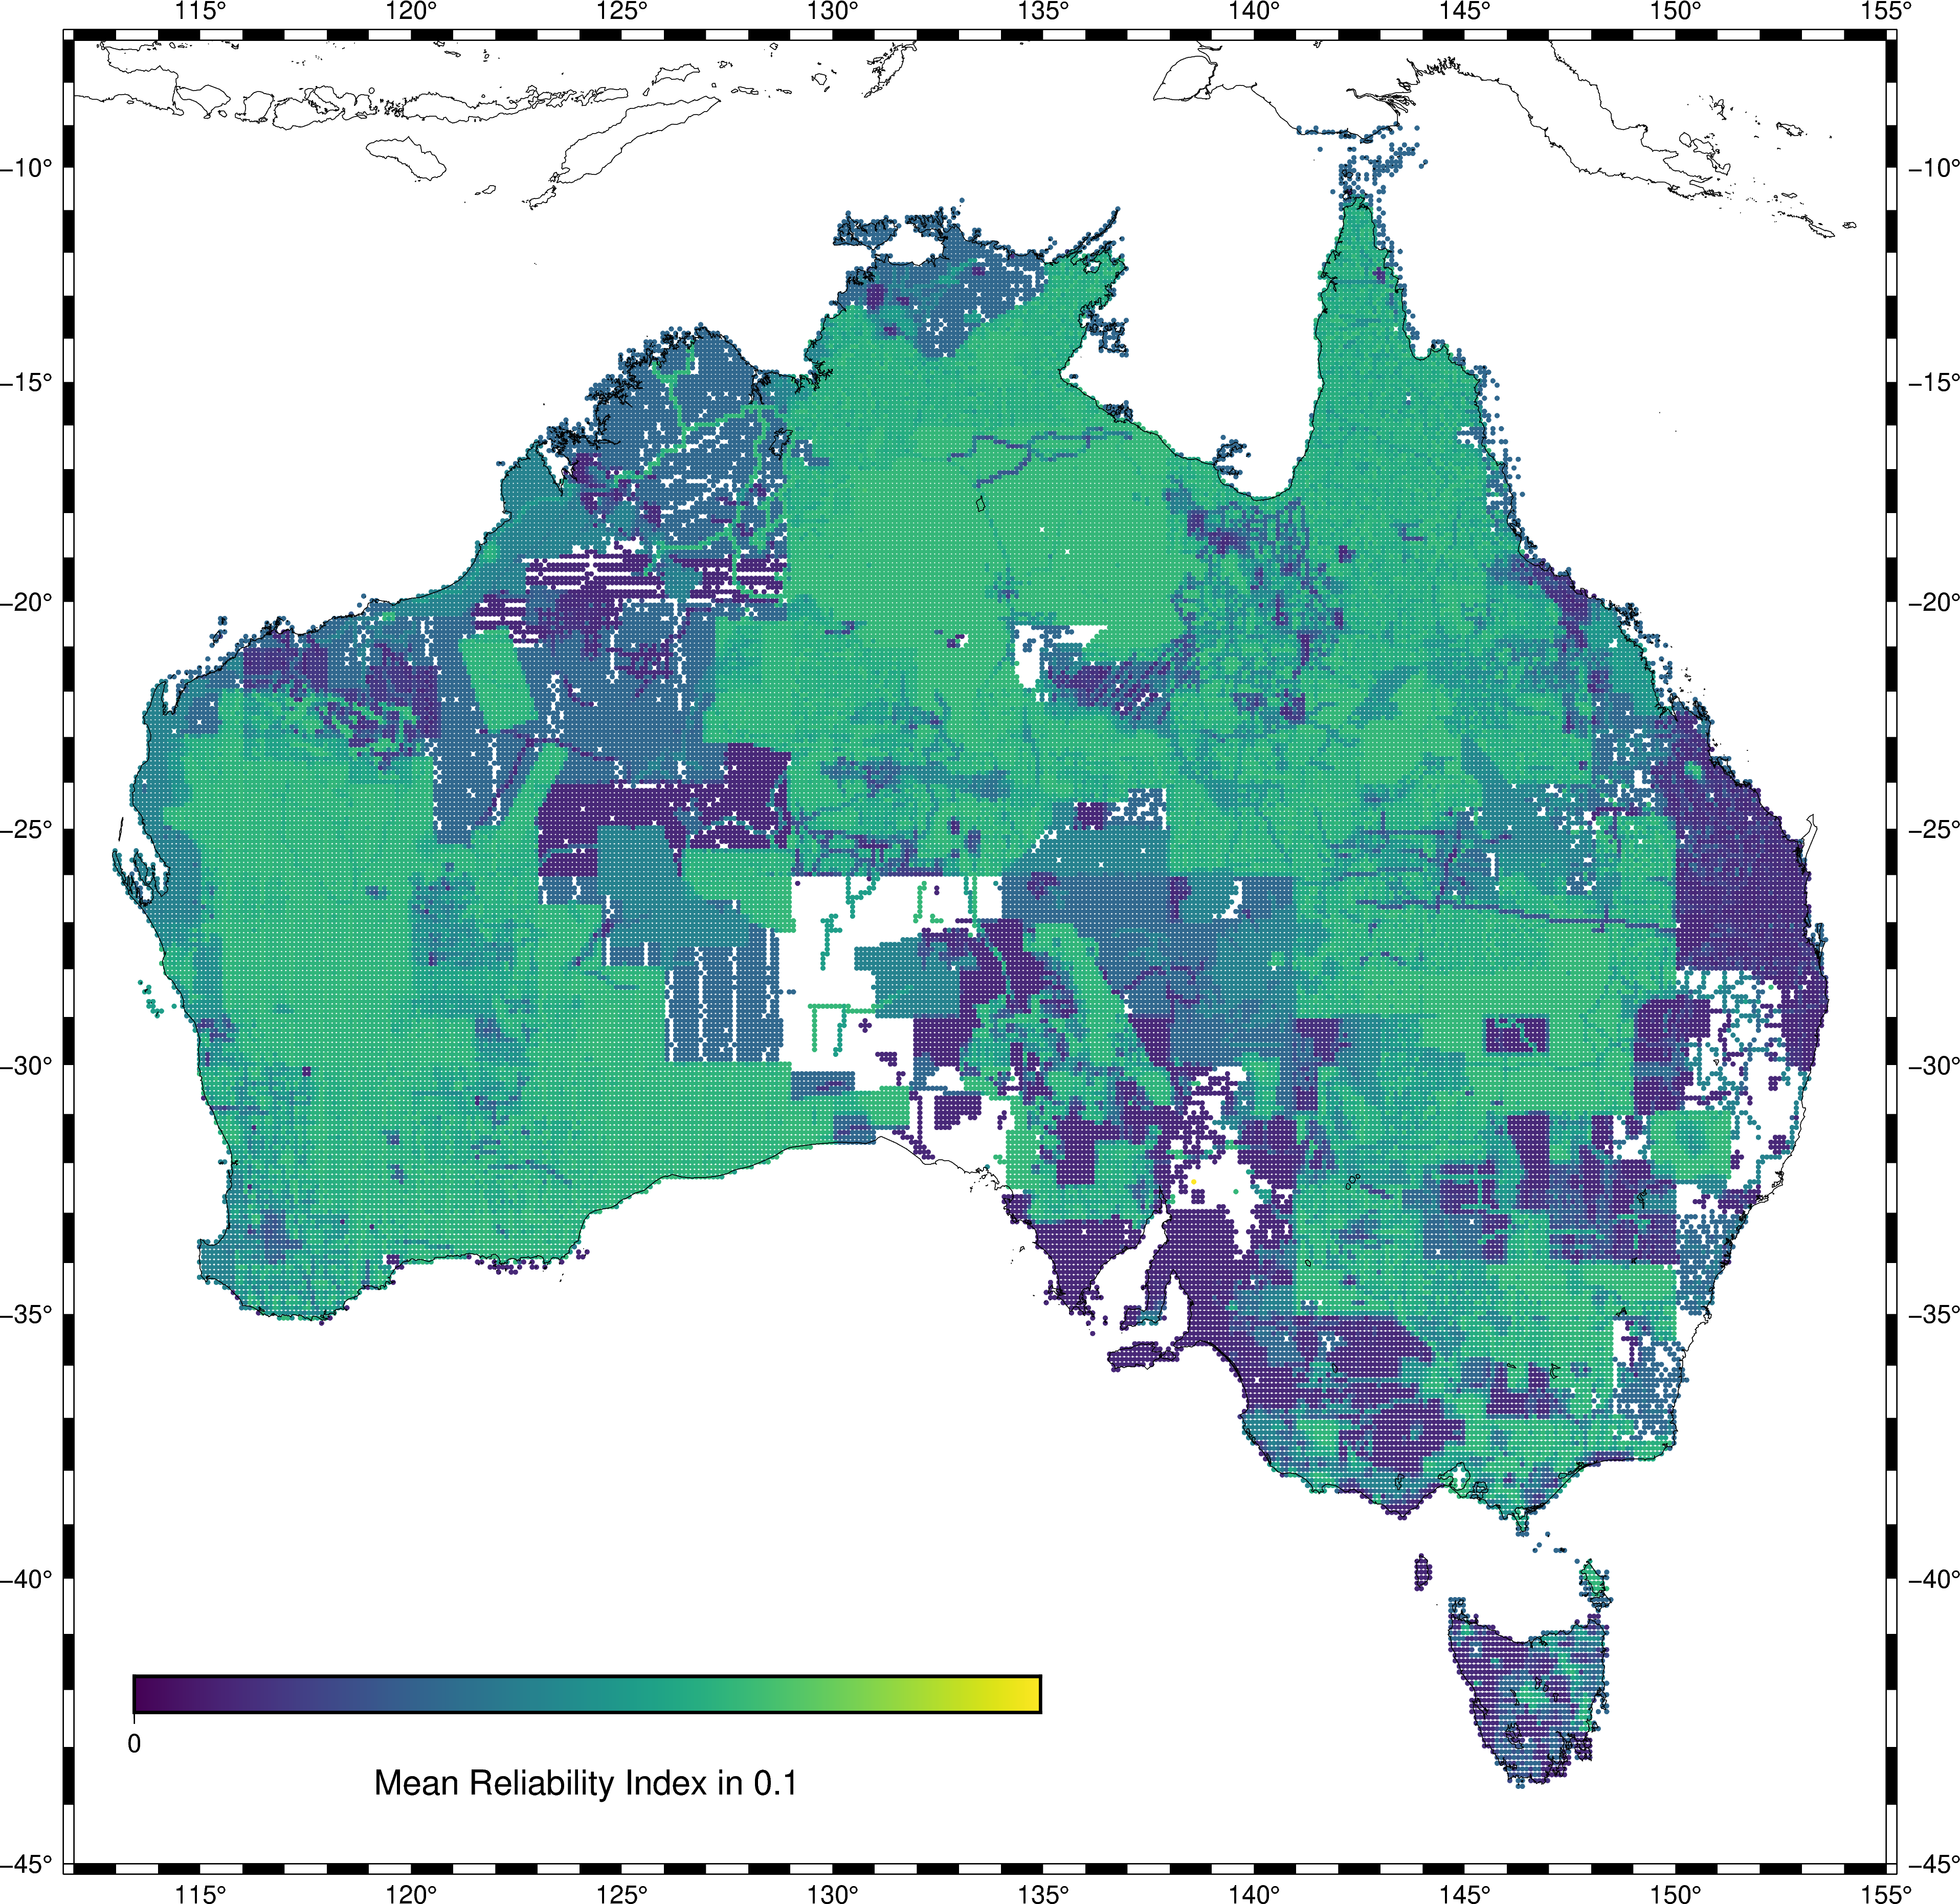

In [84]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M30c", frame="af")
pygmt.makecpt(cmap="viridis", series=[0,9])
fig.plot(longitude, latitude, color=reliability_index, style="c0.08c", cmap=True)
fig.colorbar(
    position="jBL+h+w15c+o1c/2.5c", 
    frame=f'x500+l"Mean Reliability Index in {blockmean.spacing}"'
)
fig.coast(shorelines=True)
fig.show(width=900)

In [88]:
projectionJ = '"+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"' 

In [91]:
reliability_grid = pygmt.surface(x=data.longitude, y=data.latitude, z=data.reliability_index2, region=region, spacing='0.1', J=projectionJ,outfile='reliability_indexWGS84.nc')

RUNARGS -Greliability_indexWGS84.nc -I0.1 -J"+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs" -R112/155/-45/-7


surface [WARNING]: 1723161 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


In [90]:
#output grid to raster
pygmt.surface(x=data.longitude, y=data.latitude, z=data.reliability_index2, region=region, spacing='0.1', J=projectionJ,outfile='junkWGS84.nc')

RUNARGS -GjunkWGS84.nc -I0.1 -J"+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs" -R112/155/-45/-7


surface [WARNING]: 1723161 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


RUNARGS -Baf -JM30c -R112/155/-45/-7
RUNARGS -Cviridis -T0/9
RUNARGS -Crainbow -J"+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs" -R112/155/-45/-7 -p143/32
RUNARGS -A -E300 -FC:\Users\rscott\AppData\Local\Temp\2bcb0e413fd54448b048715657d016f1-preview-lv27ue7o\2bcb0e413fd54448b048715657d016f1 -Qg2 -Qt2 -TG


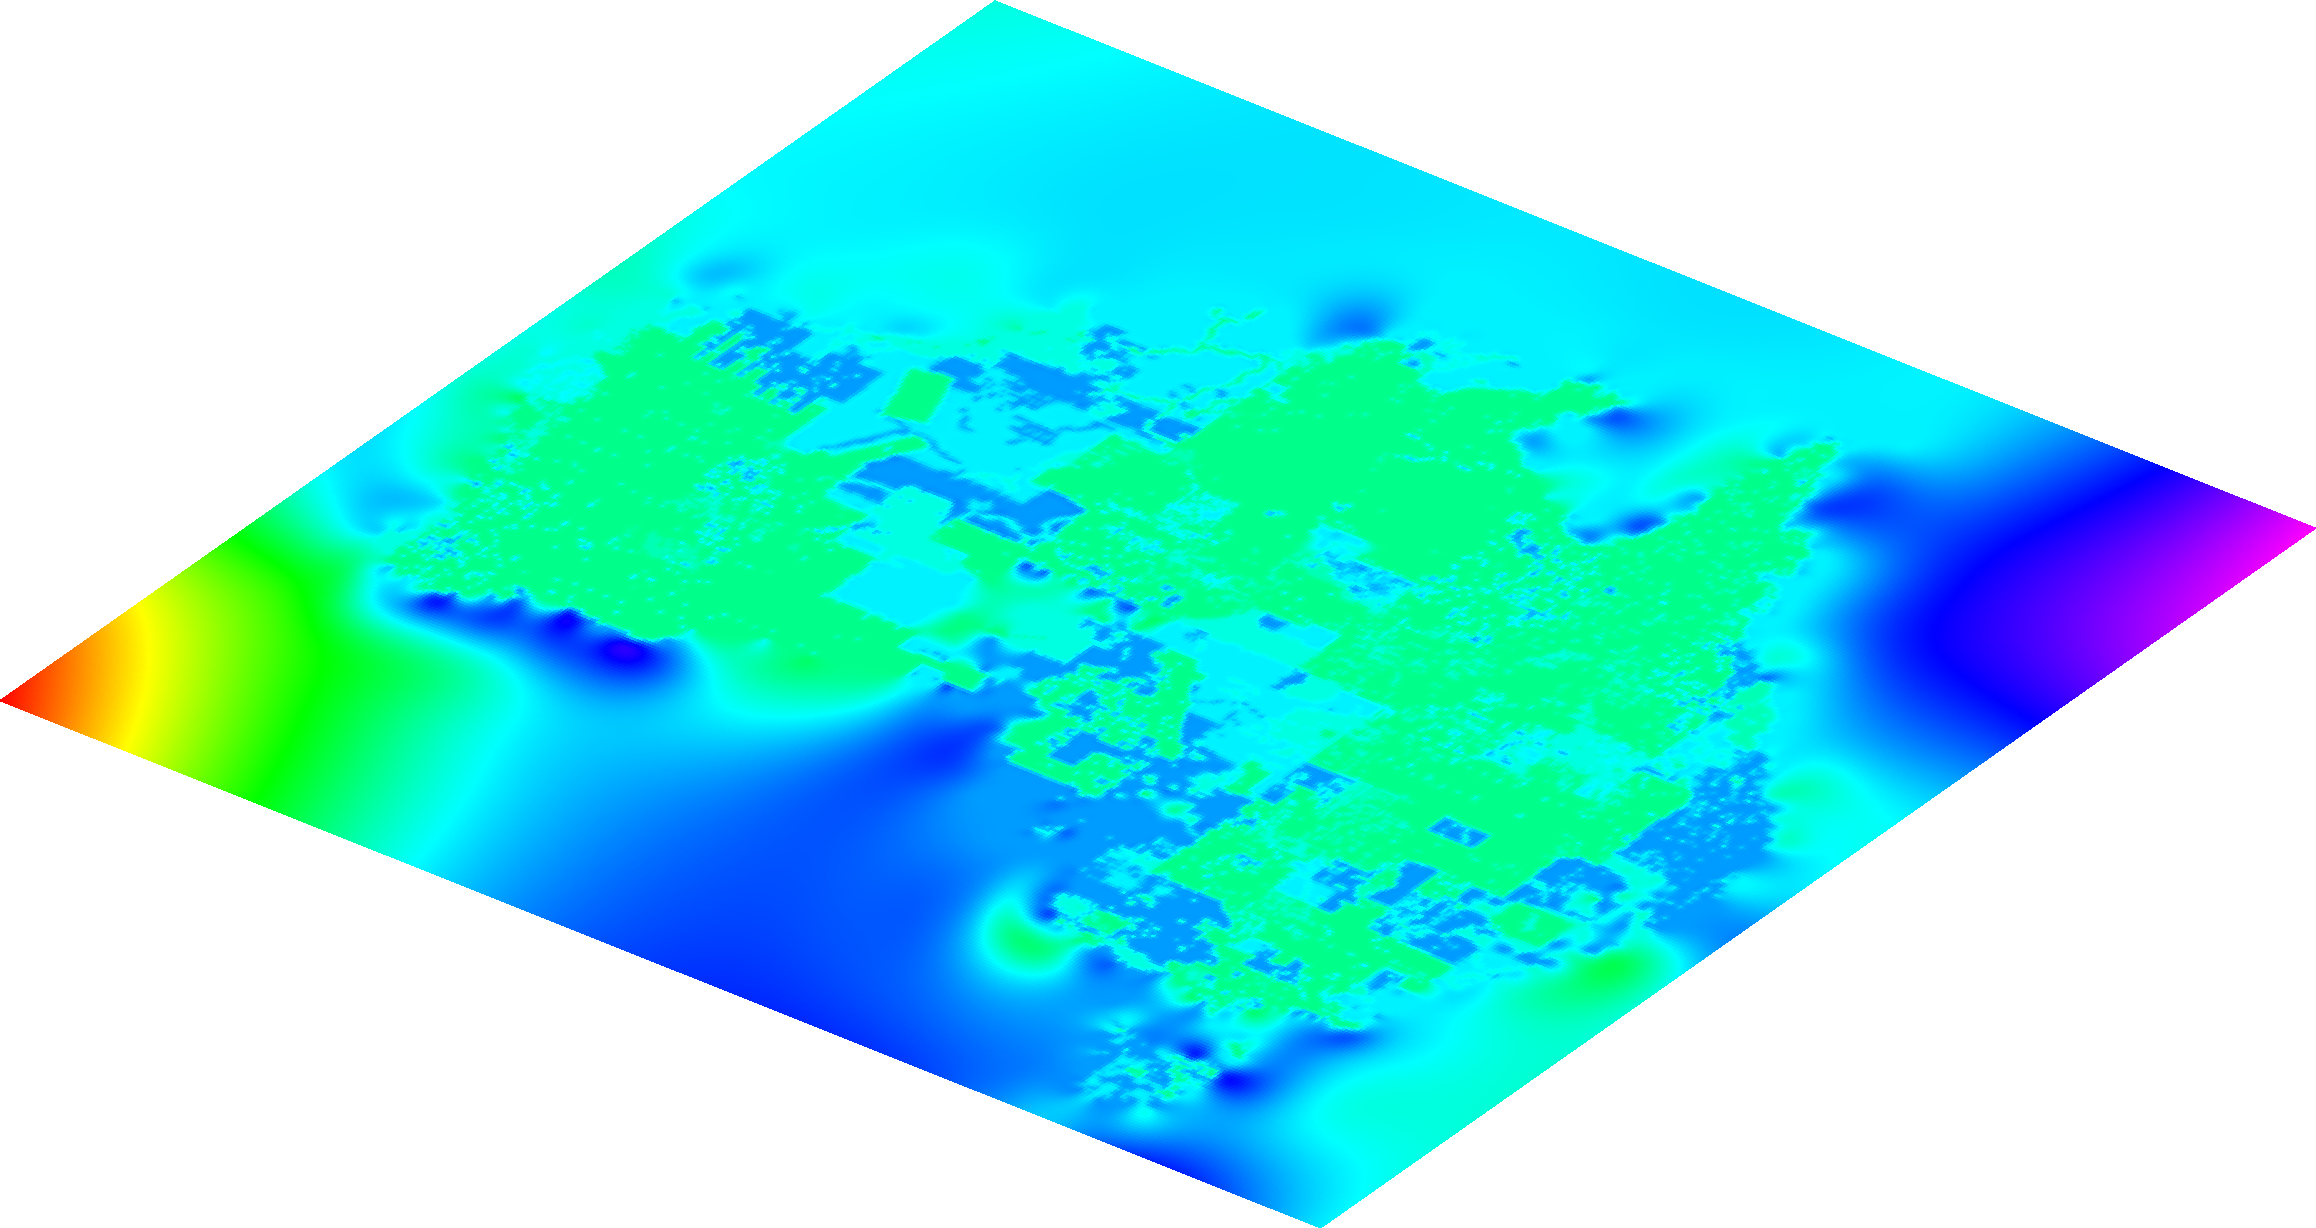

In [78]:
fig2 = pygmt.Figure()
fig.basemap(region=region, projection="M30c", frame="af")
pygmt.makecpt(cmap="viridis", series=[0,9])
fig2.grdimage(junk, region=region, J=projectionJ, cmap="rainbow", p="143/32")
fig2.show()

#plot grid at a funky angle for entertainment as a nice map above anyway
